In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dog(img, k, sigma, p, size=(7, 7)):
    img1 = cv2.GaussianBlur(img, size, sigma)
    img2 = cv2.GaussianBlur(img, size, sigma * k)

    return ((1 + p) * img1) - p * img2

def thresholding(img, epsilon, phi):
    img = img / 255
    mask = img >= epsilon
    img[mask] = 1
    img[~mask] = 1 + np.tanh(phi * (img[~mask] - epsilon))
    img = img * 255
    return img

def xdog(img, k, sigma, p, epsilon, phi):
    dimg = dog(img, k, sigma, p)
    thresh = thresholding(dimg, epsilon, phi)
    thresh = np.stack((thresh, thresh, thresh), axis=2).astype(np.uint8)
    return thresh

# Example usage:
# img = cv2.imread('your_image.jpg')  # Replace with the path to your image
# result = xdog(img, k, sigma, p, epsilon, phi)
# plt.imshow(result)
# plt.show()


interactive(children=(FloatSlider(value=5.0, description='k', max=10.0, min=0.1), FloatSlider(value=5.0, descr…

<function __main__.update(k, sigma, p, epsilon, phi)>

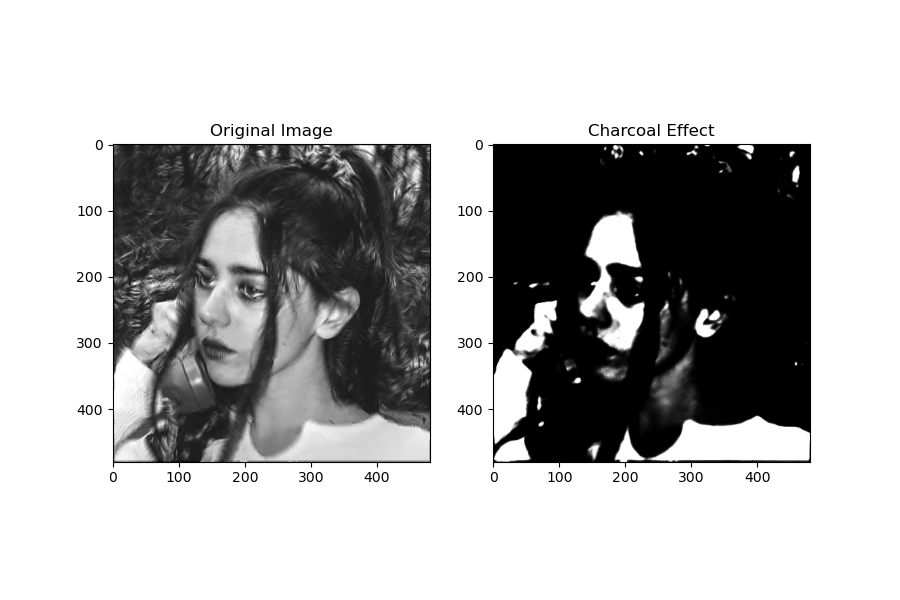

In [9]:
# use interactive slider to adjust the parameters

%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2

# load image
img = cv2.imread("./image/fdog/car2_H2.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# convert to grayscale
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# plot the images in 16 by 9 aspect ratio
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img,cmap='gray')
ax.set_title("Original Image")

# ax = fig.add_subplot(1, 2, 2)
# ax.imshow(img,cmap='gray')
# ax.set_title("XDoG Image")

# define the function to be called when the slider is adjusted
def update(k,sigma,p,epsilon,phi):
    result = xdog(img,k,sigma,p,epsilon,phi)
    # plt.imshow(result,cmap='gray')
    # plt.title("XDoG Image")
    # plt.show()
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(result,cmap='gray')
    ax.set_title("Charcoal Effect")
    fig.canvas.draw_idle()

    # parameter value 2.7 1.3 2.3 0.79 1.8

# create the sliders
interact(update, k=(0.1, 10, 0.1), sigma=(0.1, 10, 0.1), p=(0.1, 10, 0.1), epsilon=(0.01, 1.5, 0.01), phi=(0.1, 30, 0.1))


Text(0.5, 1.0, 'k=7.9, sigma=10.0, p=0.1, e=0.59, phi=22.6')

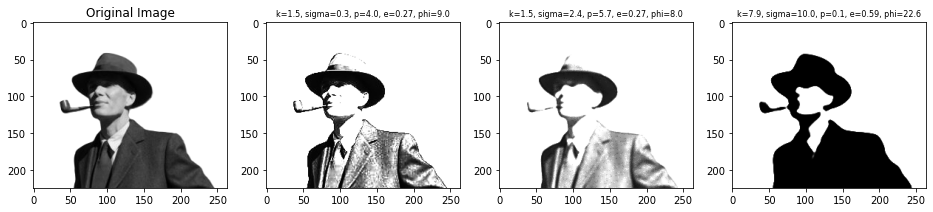

In [7]:
# load an image and apply xdog function for comparison
img = cv2.imread("./image/abstraction/oppie.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

result1 = xdog(img, 1.5, 0.3, 4.00, 0.27, 9.0)
result2 = xdog(img, 1.5, 2.4, 5.7, 0.27, 5.90)
result3 = xdog(img, 7.9, 10.0, 0.1, 0.59, 22.6)

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 4, 1)
ax.imshow(img,cmap='gray')
ax.set_title("Original Image")

ax = fig.add_subplot(1, 4, 2)
ax.imshow(result1,cmap='gray')
ax.set_title("k=1.5, sigma=0.3, p=4.0, e=0.27, phi=9.0", fontsize=8)

ax = fig.add_subplot(1, 4, 3)
ax.imshow(result2,cmap='gray')
ax.set_title("k=1.5, sigma=2.4, p=5.7, e=0.27, phi=8.0", fontsize=8)

ax = fig.add_subplot(1, 4, 4)
ax.imshow(result3,cmap='gray')
ax.set_title("k=7.9, sigma=10.0, p=0.1, e=0.59, phi=22.6", fontsize=8)

# large title 
# plt.suptitle("Abstraction Image")

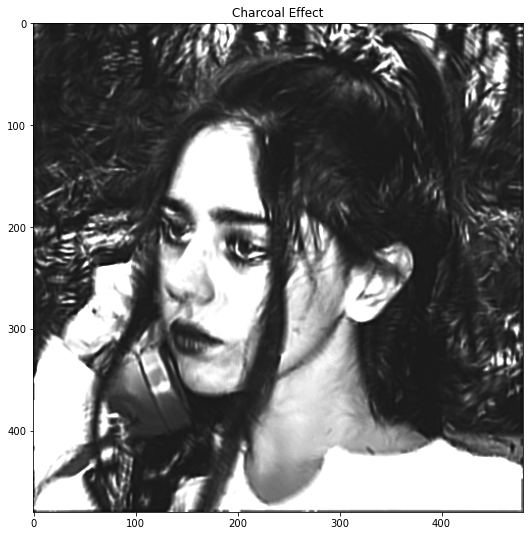

True

In [2]:
# load an image and apply xdog function for comparison
img = cv2.imread("./image/fdog/car2_H2.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

result = xdog(img, 2.7, 1.3, 2.3, 0.74, 2.3)

# save output
plt.figure(figsize=(16,9))
plt.imshow(result,cmap='gray')
plt.title("Charcoal Effect")
plt.show()

cv2.imwrite("./image/fdog/girl_final_charcoal_final.png", result)

Text(0.5, 1.0, 'Final Image')

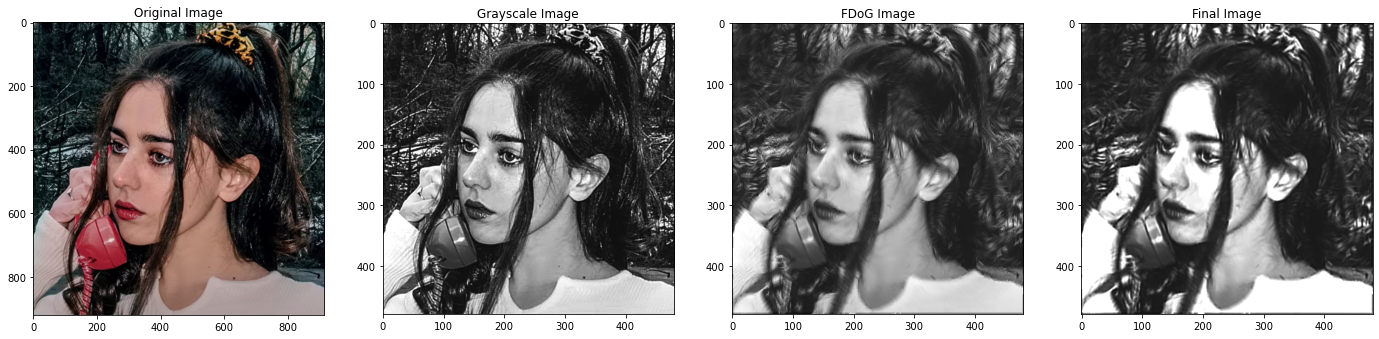

In [6]:
# load images to create a subplot
img1 = cv2.imread("./image/fdog/car2_H2.png", cv2.IMREAD_COLOR)
img2 = cv2.imread("./image/fdog/girl_final_charcoal_final.png", cv2.IMREAD_COLOR)
img3 = cv2.imread("./image/fdog/girl2_xdog.png", cv2.IMREAD_COLOR)
img4 = cv2.imread("./image/fdog/girl.png", cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

# resize the images
# img1 = cv2.resize(img1, (480,480))
img2 = cv2.resize(img2, (480,480))
img3 = cv2.resize(img3, (480,480))

# plot the images in 16 by 9 aspect ratio
fig = plt.figure(figsize=(24,9))
ax = fig.add_subplot(1, 4, 1)
# plot img4 as color
ax.imshow(img4)
ax.set_title("Original Image")

ax = fig.add_subplot(1, 4, 2)
ax.imshow(img3,cmap='gray')
ax.set_title("Grayscale Image")

ax = fig.add_subplot(1, 4, 3)
ax.imshow(img1,cmap='gray')
ax.set_title("FDoG Image")

ax = fig.add_subplot(1, 4, 4)
ax.imshow(img2,cmap='gray')
ax.set_title("Final Image")
